In [1]:
!pip install pandas


In [2]:
#Break down the result csv file into smaller ones by their emotion
import pandas as pd
df = pd.read_csv('large_text_with_emotions.csv')
emotion_column = 'dominant_emotion'  # use the actual column name

grouped = df.groupby(emotion_column) # Group by the dominant emotion label

for emotion, group in grouped:
    filename = f'tweets_{emotion}.csv'
    group.to_csv(filename, index=False)
    print(f'Saved {len(group)} tweets to {filename}') # save each to a separate CSV file

Saved 1970 tweets to tweets_admiration.csv
Saved 2670 tweets to tweets_amusement.csv
Saved 705 tweets to tweets_anger.csv
Saved 877 tweets to tweets_annoyance.csv
Saved 1542 tweets to tweets_approval.csv
Saved 667 tweets to tweets_caring.csv
Saved 428 tweets to tweets_confusion.csv
Saved 1497 tweets to tweets_curiosity.csv
Saved 752 tweets to tweets_desire.csv
Saved 1051 tweets to tweets_disappointment.csv
Saved 554 tweets to tweets_disapproval.csv
Saved 405 tweets to tweets_disgust.csv
Saved 79 tweets to tweets_embarrassment.csv
Saved 2005 tweets to tweets_excitement.csv
Saved 395 tweets to tweets_fear.csv
Saved 1521 tweets to tweets_gratitude.csv
Saved 75 tweets to tweets_grief.csv
Saved 3016 tweets to tweets_joy.csv
Saved 1617 tweets to tweets_love.csv
Saved 206 tweets to tweets_nervousness.csv
Saved 13332 tweets to tweets_neutral.csv
Saved 648 tweets to tweets_optimism.csv
Saved 49 tweets to tweets_pride.csv
Saved 782 tweets to tweets_realization.csv
Saved 134 tweets to tweets_reli

In [3]:
unique_sentiments = df['dominant_emotion'].unique()

# Print the unique values and their count
print(f'There are {len(unique_sentiments)} unique sentiment types.')
print(unique_sentiments)

There are 28 unique sentiment types.
['neutral' 'joy' 'desire' 'approval' 'love' 'remorse' 'disappointment'
 'annoyance' 'realization' 'sadness' 'amusement' 'confusion' 'anger'
 'excitement' 'caring' 'admiration' 'curiosity' 'optimism' 'disapproval'
 'surprise' 'fear' 'nervousness' 'disgust' 'grief' 'gratitude'
 'embarrassment' 'relief' 'pride']


In [4]:
# Get the number of rows in the DataFrame
num_rows = df.shape[0]

print(f'The file large_text_with_emotions.csv contains {num_rows} rows.')

The file large_text_with_emotions.csv contains 40000 rows.


In [5]:
!pip install wordcloud


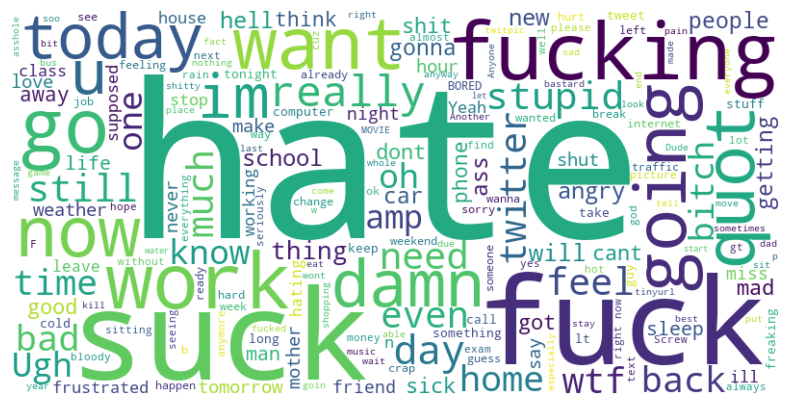

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_anger.csv')

all_text = ' '.join(df['content'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


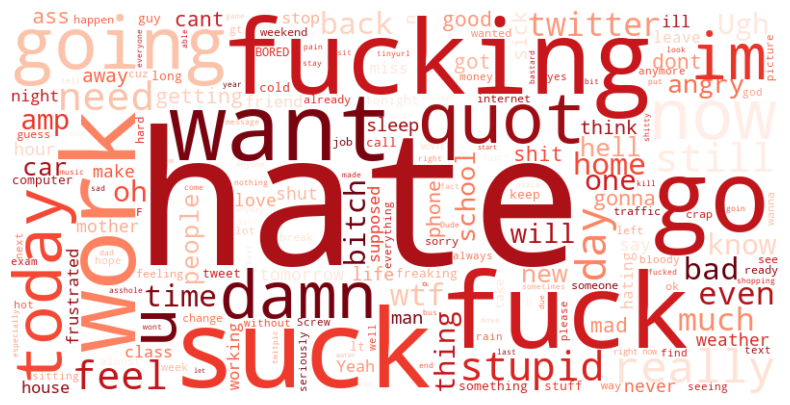

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_anger.csv')

all_text = ' '.join(df['content'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

[nltk_data] Downloading package punkt to /Users/ellenyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ellenyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


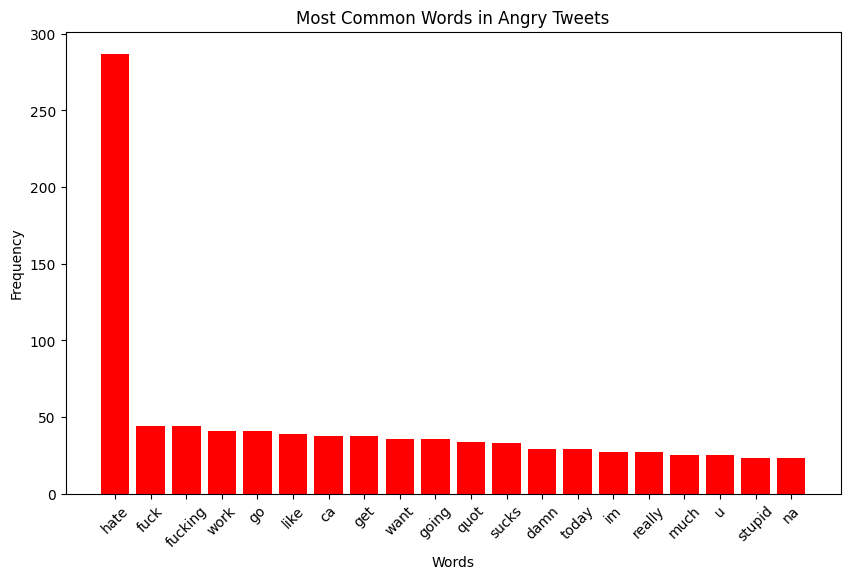

In [8]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('tweets_anger.csv')

all_text = ' '.join(df['content'].astype(str))

tokens = word_tokenize(all_text.lower())

# Remove punctuation and stopwords
tokens = [word for word in tokens if word.isalnum()]
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

most_common_words = word_counts.most_common(20)

word_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(word_df['word'], word_df['count'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Angry Tweets')
plt.xticks(rotation=45)
plt.show()


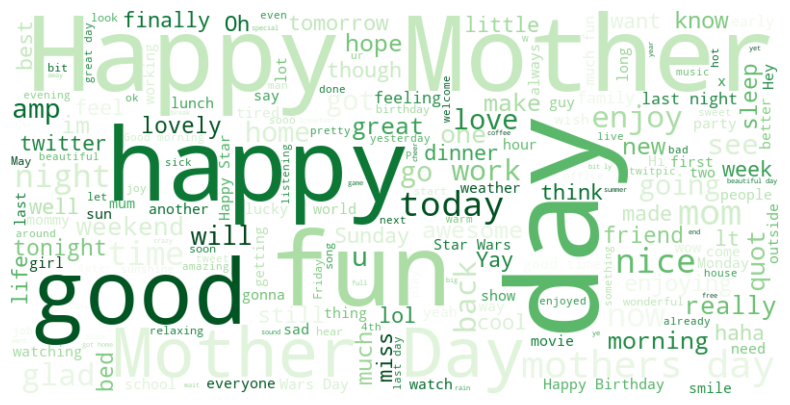

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_joy.csv')

all_text = ' '.join(df['content'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

[nltk_data] Downloading package punkt to /Users/ellenyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ellenyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


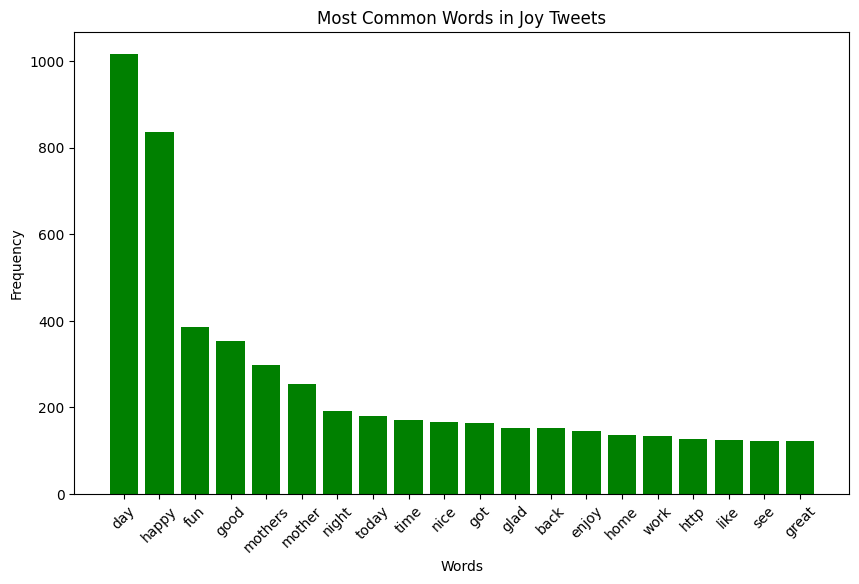

In [10]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('tweets_joy.csv')

all_text = ' '.join(df['content'].astype(str))

tokens = word_tokenize(all_text.lower())

# Remove punctuation and stopwords
tokens = [word for word in tokens if word.isalnum()]
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

most_common_words = word_counts.most_common(20)

word_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(word_df['word'], word_df['count'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Joy Tweets')
plt.xticks(rotation=45)
plt.show()


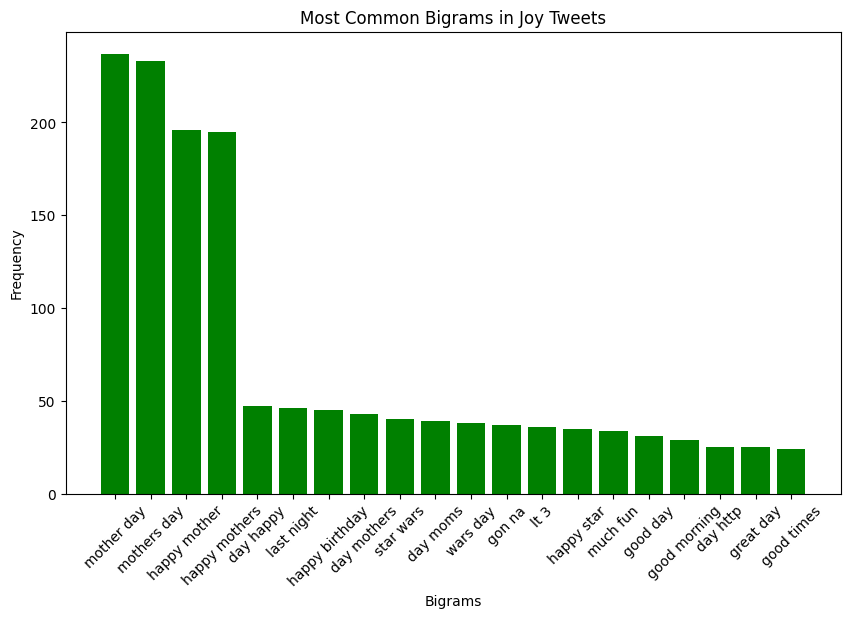

In [11]:
import pandas as pd
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt

df = pd.read_csv('tweets_joy.csv')

all_text = ' '.join(df['content'].astype(str))

tokens = word_tokenize(all_text.lower())

tokens = [word for word in tokens if word.isalnum()]
filtered_tokens = [word for word in tokens if word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)

bigram_df = pd.DataFrame(most_common_bigrams, columns=['bigram', 'count'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10, 6))
plt.bar(bigram_df['bigram'], bigram_df['count'], color='green')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Common Bigrams in Joy Tweets')
plt.xticks(rotation=45)
plt.show()


In [1]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_admiration.csv'
print(f'Total rows: {count_rows_csv(file_path)}')


Total rows: 1971


In [2]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_amusement.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 2671


In [3]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_anger.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 706


In [4]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_annoyance.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 878


In [5]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_approval.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 1543


In [6]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_caring.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 668


In [7]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_confusion.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 429


In [8]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_curiosity.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 1498


In [9]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_desire.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 753


In [10]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_disappointment.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 1052


In [11]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_disapproval.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 555


In [12]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_disgust.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 406


In [14]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_embarrassment.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 80


In [15]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_excitement.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 2006


In [18]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_fear.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 396


In [16]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_gratitude.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 1522


In [17]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_grief.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 76


In [19]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_joy.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 3017


In [20]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_love.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 1618


In [21]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_nervousness.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 207


In [22]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_optimism.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 649


In [23]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_pride.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 50


In [24]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_realization.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 783


In [25]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_relief.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 135


In [26]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_remorse.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 384


In [27]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_sadness.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 2157


In [28]:
import csv

def count_rows_csv(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

file_path = 'tweets_surprise.csv'
print(f'Total rows: {count_rows_csv(file_path)}')

Total rows: 485
